In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

dataset=fetch_california_housing()
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['Target'] = dataset['target']
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [69]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [73]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [79]:
df['HouseAge'].max()

52.0

In [90]:
# bins = [10, 30, 60]
df['HouseAgeCat'] = pd.cut(bins=[0,10,30,60],labels=['New', 'Old', 'Very_Old'], x =df['HouseAge'])


TypeError: '<' not supported between instances of 'int' and 'str'

In [81]:
corr_matrix = df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,New,Old,Very_Old
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075,0.103192,0.036393,-0.095556
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623,-0.498632,-0.606382,0.837604
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948,0.085493,0.086697,-0.131987
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701,0.035258,0.056618,-0.071373
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650,0.205117,0.141799,-0.244489
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737,-0.002255,-0.014666,0.015224
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160,-0.019007,0.048495,-0.039006
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967,0.063097,0.011140,-0.039876
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000,-0.016387,-0.069185,0.068485
New,0.103192,-0.498632,0.085493,0.035258,0.205117,-0.002255,-0.019007,0.063097,-0.016387,1.000000,-0.177157,-0.277289


<Axes: >

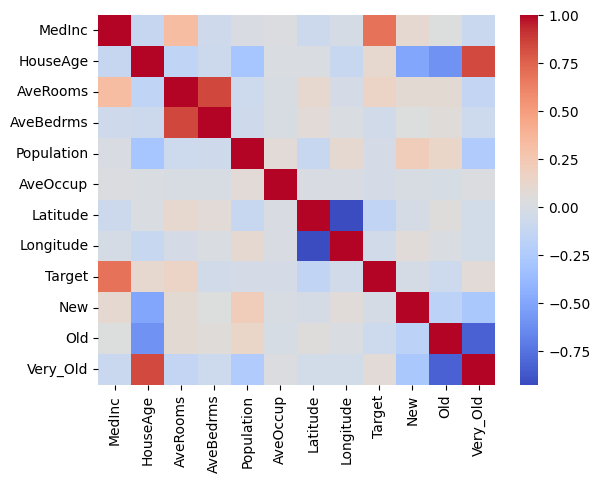

In [82]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

(0.0, 2000.0)

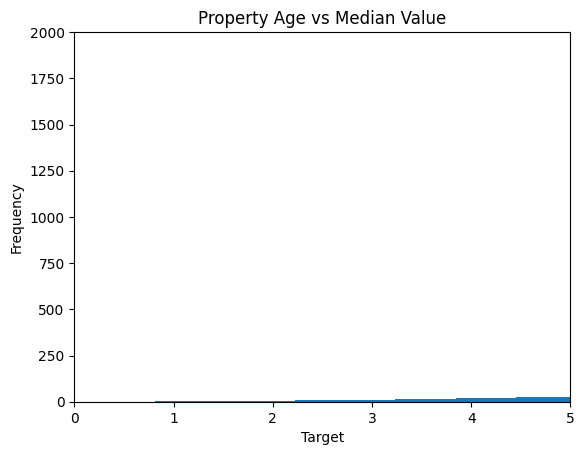

In [78]:
df.median()
x = np.linspace(0,20, num=100, endpoint=True)
y = x * x

fig,ax=plt.subplots()
ax.set_title('Property Age vs Median Value')
ax.bar(x,y)
ax.set_ylabel('Frequency')
ax.set_xlabel('Target')
ax.set_xlim(0,5)
ax.set_ylim(0,2000)

In [ ]:
# df['New'] = (df['HouseAge'] <= bins[0]).astype(int)
# df['Old'] = ((df['HouseAge'] >= bins[0]) & (df['HouseAge'] <= bins[1])).astype(int)
# df['Very_Old'] = ((df['HouseAge'] >= bins[1]) & (df['HouseAge'] <= bins[2])).astype(int)
# print(df)